<a href="https://colab.research.google.com/github/Surbhikhandelwal65/AdvancedMachineLearning/blob/main/skhande4_FinalProjectGoogleMapsGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image to Image Translation Using GAN
## Satellite to Map Image Translation



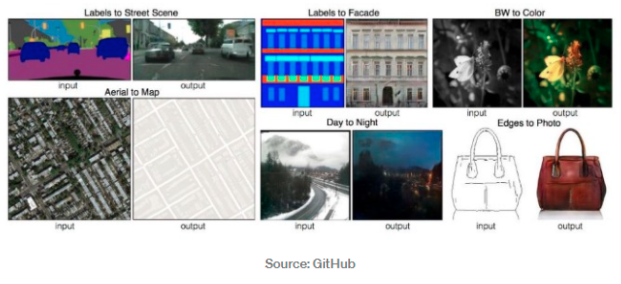

### Abstract

Pix2Pix GAN paper was published back in 2016 by [Phillip Isola](https://arxiv.org/search/cs?searchtype=author&query=Isola%2C+P), [Jun-Yan Zhu](https://arxiv.org/search/cs?searchtype=author&query=Zhu%2C+J), [Tinghui Zhou](https://arxiv.org/search/cs?searchtype=author&query=Zhou%2C+T), Alexei A. Efros [Alexei A. Efros](https://arxiv.org/search/cs?searchtype=author&query=Efros%2C+A+A). 
In the paper, they used the conditional GAN to map any image to any other image like city view in day to city view at night, black and white photos to color photos. Using pix2pix, we can map any image to any other image like the edges of an object to the image of the object. Here, we will be using this GAN model for the application of mapping satellite images to google map images. We will be using GAN, a model designed for general purpose image-to-image classification. We will first train the deep convolutional neural network for image-to-image translation tasks and then we will then use the generator to generate real-like google map images from unseen (validation) satellite images. 


## What is GAN (Generative Adversarial Network)?

Generative Adversarial Networks, or GANs, are a deep-learning-based generative model. GANs are model architectures that are used for training generative models and they are most commonly used with deep learning models like neural networks.

What are generative models?

Generative modeling is an unsupervised learning task that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset.


## Architecture of GAN
The GAN model architecture involves two sub-models: 

* Generator:  This model is used to generate new plausible examples from the problem domain.


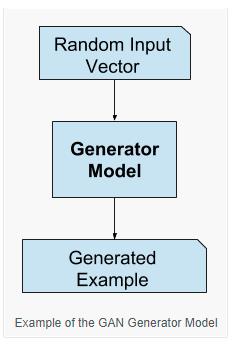

* Discriminator: This model is used to classify examples as real (from the domain) or fake (generated).


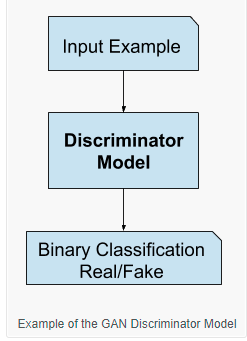

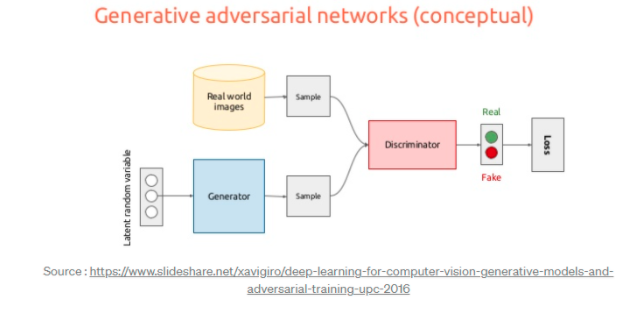

Let’s try and understand this architecture simply:

The first neural network is called the Generator. It generates fake data points and passes them to its opponent. That’s the second network, the Discriminator whose job is to tell which data point is real and which is fake.

First, we train the Discriminator on a set of real and fake data points. The discriminator guesses what is real and what is fake. After that, we unveil the real solution to it. Based on the feedback, the discriminator learns what is fake and what is not.

Now going back to the Generator. We give the Generator real and fake data points to train with. Based on these points, its job is to make new data points that look so real that we can fool the Discriminator.
We give the Generator both real data points and fake data points because we don’t want it to get too good too fast. Otherwise, the Discriminator can’t keep up.

So, say the Generator has made fake data. And it’ll try and fool the Discriminator. The Discriminator will hopefully do a reasonable job at differentiating the real data points from the fake ones. It then informs the Generator about its decisions. And based on this decision, the Generator will set to work again. It’ll make new fakes, but based on the feedback it will try to make them better so that they fool the Discriminator.

And this takes us to the applications of GAN.


## Applications Of GAN
The main focus for GANs is to generate data from scratch, mostly images but nowadays it’s applications in music are also being explored. Some of the top areas where GANs are currently being used are:
* Image Super-Resolution -  The ability to generate high-resolution versions of input images.
* Creating Art -  The ability to create new and artistic images, sketches, painting, and more.
* Image-to-Image Translation - The ability to translate photographs across domains, such as day to night, summer to winter, and more.

It’s this Image-to-Image translation that we will be doing today.


## Image-to-Image Translation Model
### Introduction
Creating maps can be a pretty expensive and time-consuming process. But it’s also of a lot of importance. They are useful across many industries like ride-sharing companies ( Uber and Lyft), food delivery companies (DoorDash and GrubHub), etc. Currently, there is considerable latency between changes to geographic/road conditions on the ground and the publicly available human-readable maps. One way to reduce this latency is to automate the process of human-readable map generation from a satellite image of a given location at a specific zoom level and resolution. In this work, we emphasize the importance of human-readability of a map and aim to construct accurate human-readable maps directly from a satellite/aerial image of the location. 

### Model Architecture
We will be building a condition GAN where the generation of the output image is conditional on the input image, in this case, a source image. 
The GAN architecture is comprised of:
* Generator model for outputting new plausible synthetic images, 
* Discriminator model that classifies images as real (from the dataset) or fake (generated). 
* The discriminator model is updated directly, whereas the generator model is updated via the discriminator model. 

As such, the two models are trained simultaneously in an adversarial process where the generator tries to fool the discriminator and the discriminator tries to better identify the counterfeit images.
We have divided the modeling process into 3 steps, they are: 
* Satellite to Map Image Translation Dataset
* Develop and Train The Model
* Translate Images With The Model

### Satellite to Map Image Translation Dataset
We will be using the “maps” dataset. This is a dataset composed of satellite images of New York and their corresponding Google maps pages. It consists of a train folder with 1,097 images and the validation dataset contains 1,099 images.
Images are in JPEG format. Each image has Width X Height of 1,200 pixels X 600 pixels and contains the satellite image on the left and the Google maps image on the right.


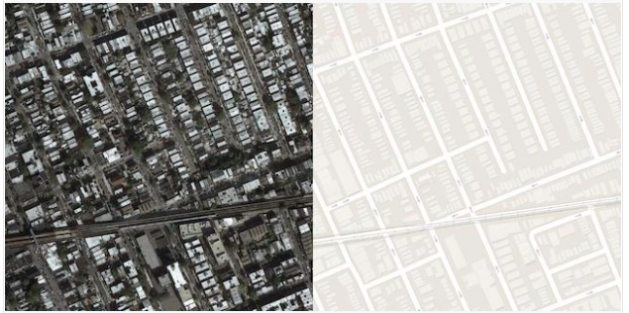

### Loading The Dataset

Each image will be loaded, rescaled, and split into the satellite and Google map elements. The result will be 1,097 color image pairs with the width and height of 256×256 pixels.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
import shutil




Mounted at /content/gdrive


In [ ]:
# load, split and scale the maps dataset ready for training
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
from PIL import Image
from keras.preprocessing import image as image_utils

In [ ]:
# load all images in a directory into memory
def load_images(path, size=(256,512)):
	src_list, tar_list = list(), list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# split into satellite and map
		sat_img, map_img = pixels[:, :256], pixels[:, 256:]
		src_list.append(sat_img)
		tar_list.append(map_img)
	return [asarray(src_list), asarray(tar_list)]

# dataset path
path = '/content/gdrive/MyDrive/Colab Notebooks/maps/train/'

# load dataset
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)

# save as compressed numpy array
filename = 'maps_256.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)

Loaded:  (1092, 256, 256, 3) (1092, 256, 256, 3)
Saved dataset:  maps_256.npz


Let's look at some of the data: We can then plot some images pairs to confirm the data has been handled correctly.

Loaded:  (1092, 256, 256, 3) (1092, 256, 256, 3)


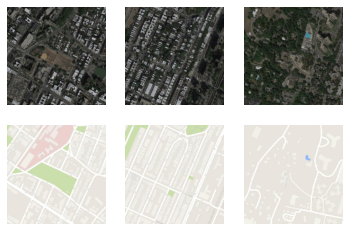

In [ ]:
# load the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('maps_256.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

### 2. Train and Develop The Model

The architecture consists of two models: the discriminator and the generator.

* Discriminator

It is a deep convolutional neural network that performs image classification. Specifically, conditional-image classification. It takes both the source image (e.g. satellite photo) and the target image (e.g. Google maps image) as inputs and predicts the likelihood of whether target image is real or a fake translation of the source image.

The model takes two input images that are concatenated together and predicts output of predictions. The model is optimized using binary cross entropy, and a weighting is used so that updates to the model have half (0.5) the usual effect. 

* Generator

The generator is an encoder-decoder model that uses an U-Net architecture. The model takes a source image (satellite photo) and generates the target image (Google maps image). It does this by first encoding the input image down to a bottleneck layer, then decoding the bottleneck representation to the size of the output image. The U-Net architecture means that skip-connections are added between the encoding layers and the corresponding decoding layers, forming a U-shape.

The encoder and decoder of the generator is composed of standardized blocks of convolutional, batch normalization, dropout, and activation layers.

The discriminator model is trained directly on real and generated images., whereas the generator model is trained via the discriminator model. 
It is updated to minimize the loss predicted by the discriminator for generated images marked as “real.” As such, it is encouraged to generate more real images. The generator is also updated to minimize the L1 loss or mean absolute error between the generated image and the target image.

A source image is provided as input to the generator and to the discriminator, although the output of the generator is connected to the discriminator as the corresponding “target” image. The discriminator then predicts the likelihood that the generator was a real translation of the source image.



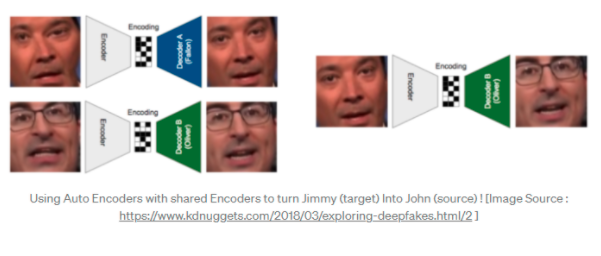

#### Training The Model

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# example of pix2pix gan for satellite to map image-to-image translation
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realB[i])
	# save plot to file
	filename1 = 'plot_%06d.png' % (step+1)
	pyplot.savefig(filename1)
	pyplot.close()
	# save the generator model
	filename2 = 'model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

# train pix2pix models
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		# summarize model performance
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model, dataset)

# load image data
dataset = load_real_samples('maps_256.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
train(d_model, g_model, gan_model, dataset)

Streaming output truncated to the last 5000 lines.
>104202, d1[0.332] d2[0.407] g[3.724]
>104203, d1[0.225] d2[0.445] g[4.214]
>104204, d1[0.304] d2[0.301] g[3.922]
>104205, d1[0.258] d2[0.283] g[4.445]
>104206, d1[0.394] d2[0.315] g[4.446]
>104207, d1[0.308] d2[0.340] g[4.135]
>104208, d1[0.338] d2[0.318] g[3.661]
>104209, d1[0.308] d2[0.394] g[3.448]
>104210, d1[0.324] d2[0.319] g[3.099]
>104211, d1[0.368] d2[0.377] g[3.529]
>104212, d1[0.500] d2[0.258] g[2.571]
>104213, d1[0.273] d2[0.402] g[4.485]
>104214, d1[0.414] d2[0.318] g[1.306]
>104215, d1[0.379] d2[0.298] g[3.684]
>104216, d1[0.276] d2[0.419] g[5.015]
>104217, d1[0.347] d2[0.311] g[3.597]
>104218, d1[0.264] d2[0.382] g[3.899]
>104219, d1[0.430] d2[0.285] g[3.156]
>104220, d1[0.395] d2[0.328] g[1.936]
>104221, d1[0.292] d2[0.356] g[3.940]
>104222, d1[0.286] d2[0.361] g[4.251]
>104223, d1[0.361] d2[0.296] g[3.363]
>104224, d1[0.407] d2[0.327] g[1.192]
>104225, d1[0.241] d2[0.506] g[4.707]
>104226, d1[0.319] d2[0.312] g[4.254]

### Model Performance

Typically, GAN models do not converge; instead, an equilibrium is found between the generator and discriminator models. As such, we cannot easily judge when training should stop. Therefore, we can save the model and use it to generate sample image-to-image translations periodically during training, such as every 100 training epochs.

Each training step involves first selecting a batch of real examples, then using the generator to generate a batch of matching fake samples using the real source images. The discriminator is then updated with the batch of real images and then fake images.

Next, the generator model is updated providing the real source images as input and providing class labels of 1 (real) and the real target images as the expected outputs of the model required for calculating loss.

Finally, the loss for each update is reported to the console each training iteration and model performance is evaluated every 100 training epochs.


### 3. Using The Model To Build Maps Images

We load the training data set and our model whose weights we have saved. Then we provide the source satellite image as input to the model and use it to predict a Google map image. We can then see the source, generated and target image to see how our model performed. 


Loaded (1092, 256, 256, 3) (1092, 256, 256, 3)


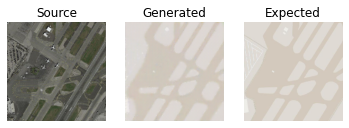

In [ ]:
# example of loading a pix2pix model and using it for image to image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint

# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
	images = vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, 3, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# show title
		pyplot.title(titles[i])
	pyplot.show()

# load dataset
[X1, X2] = load_real_samples('maps_256.npz')
print('Loaded', X1.shape, X2.shape)
# load model
model = load_model('model_109200.h5')
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)

We can see that our model performed pretty well. Just some sharpness is missing which can be again achieved by training the model some more. But this is a really good result as we can hardly find any difference between the generated output and the expected output.